In [22]:
import json
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from nltk.corpus import stopwords

In [23]:
file_path = "C:\\Users\\huyenbk\\Documents\\Machine_learning\\Vin_Code_2025\\CTAI_MachineLearning_Project\\processed_data.json"   # đổi đường dẫn nếu cần
with open(file_path, "r", encoding="utf-8") as f:
    data = json.load(f)

df = pd.DataFrame(data)
df = pd.concat([df]*4, ignore_index=True)

Tỷ lệ trung bình số từ giữ lại sau khi xử lý (content vs content_clean): 0.65


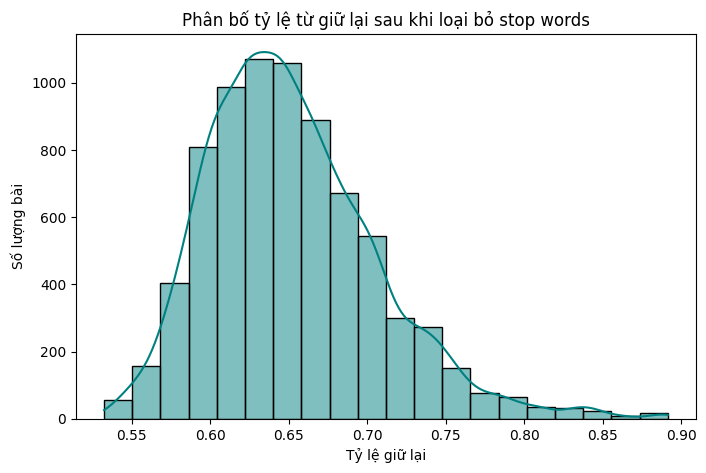

In [34]:
def calc_clean_ratio(row):
    raw = str(row["content"]).split()
    clean = str(row["content_clean"]).split()
    if len(raw) == 0:
        return 0
    return len(clean) / len(raw)

df["content_ratio"] = df.apply(calc_clean_ratio, axis=1)

# --- Thống kê ---
avg_ratio = df["content_ratio"].mean()
print(f"Tỷ lệ trung bình số từ giữ lại sau khi xử lý (content vs content_clean): {avg_ratio:.2f}")


plt.figure(figsize=(8,5))
sns.histplot(df["content_ratio"], bins=20, kde=True, color="teal")
plt.title("Phân bố tỷ lệ từ giữ lại sau khi loại bỏ stop words")
plt.xlabel("Tỷ lệ giữ lại")
plt.ylabel("Số lượng bài")
plt.show()

In [25]:
# In ra 10 bài có tỉ lệ số từ giữ lại ít nhất
min_ratio_articles = df.sort_values("content_ratio").head(10)
display(min_ratio_articles[["title", "content", "content_clean", "content_ratio"]])

,title,content,content_clean,content_ratio
1400,Máy bay Ukraine phá hủy kho đạn dược của Nga,Tờ Defense Express dẫn tin từ Cơ quan Tình báo...,tờ defense_express quan_tình_báo quốc_phòng uk...,0.532407
3307,Máy bay Ukraine phá hủy kho đạn dược của Nga,Tờ Defense Express dẫn tin từ Cơ quan Tình báo...,tờ defense_express quan_tình_báo quốc_phòng uk...,0.532407
7121,Máy bay Ukraine phá hủy kho đạn dược của Nga,Tờ Defense Express dẫn tin từ Cơ quan Tình báo...,tờ defense_express quan_tình_báo quốc_phòng uk...,0.532407
5214,Máy bay Ukraine phá hủy kho đạn dược của Nga,Tờ Defense Express dẫn tin từ Cơ quan Tình báo...,tờ defense_express quan_tình_báo quốc_phòng uk...,0.532407
5723,Thành lập Bộ Tư lệnh Pháo binh - Tên lửa,"Phát biểu tại lễ công bố, Đại tướng Nguyễn Tân...",phát_biểu lễ công_bố đại_tướng nguyễn_tân_cươn...,0.535262
1909,Thành lập Bộ Tư lệnh Pháo binh - Tên lửa,"Phát biểu tại lễ công bố, Đại tướng Nguyễn Tân...",phát_biểu lễ công_bố đại_tướng nguyễn_tân_cươn...,0.535262
2,Thành lập Bộ Tư lệnh Pháo binh - Tên lửa,"Phát biểu tại lễ công bố, Đại tướng Nguyễn Tân...",phát_biểu lễ công_bố đại_tướng nguyễn_tân_cươn...,0.535262
3816,Thành lập Bộ Tư lệnh Pháo binh - Tên lửa,"Phát biểu tại lễ công bố, Đại tướng Nguyễn Tân...",phát_biểu lễ công_bố đại_tướng nguyễn_tân_cươn...,0.535262
3847,Tổng Bí thư Tô Lâm chủ trì buổi gặp mặt các ng...,Nhân kỷ niệm 80 năm Cách mạng Tháng Tám và Quố...,nhân kỷ_niệm 80 mạng tám quốc_khánh 2 9 hà_nội...,0.538028
33,Tổng Bí thư Tô Lâm chủ trì buổi gặp mặt các ng...,Nhân kỷ niệm 80 năm Cách mạng Tháng Tám và Quố...,nhân kỷ_niệm 80 mạng tám quốc_khánh 2 9 hà_nội...,0.538028


In [26]:
# --- Thống kê cơ bản ---
total_articles = len(df)
avg_title_len = df["title"].apply(lambda x: len(str(x).split())).mean()
avg_desc_len = df["description"].apply(lambda x: len(str(x).split())).mean()
avg_content_len = df["content"].apply(lambda x: len(str(x).split())).mean()
# avg_stopword_ratio = df["content"].apply(stopword_ratio).mean()

summary = pd.DataFrame({
    "Tổng số bài": [total_articles],
    "Độ dài TB title": [avg_title_len],
    "Độ dài TB description": [avg_desc_len],
    "Độ dài TB content": [avg_content_len],
    # "Tỉ lệ stopword TB content": [avg_stopword_ratio]
})
print("=== Thống kê cơ bản ===")
print(summary)

=== Thống kê cơ bản ===
   Tổng số bài  Độ dài TB title  Độ dài TB description  Độ dài TB content
0         7628        15.331935               37.83377          665.02517


In [27]:
# --- Thống kê số lượng bài theo category ---
df["category"] = df["metadata"].apply(lambda x: x.get("cat") if isinstance(x, dict) else None)
category_counts = df["category"].value_counts()

print("\n=== Số lượng bài theo chuyên mục ===")
print(category_counts)


=== Số lượng bài theo chuyên mục ===
Thời sự                      832
Du lịch                      744
Sức khỏe                     720
Văn hóa - Giải trí           716
Chính trị                    708
Thế giới                     696
Công nghệ                    692
Kinh doanh                   656
Giáo dục                     652
Pháp luật                    592
Thể thao                     496
Net Zero                      32
Ô tô - Xe máy                 24
Thông tin và truyền thông     20
Đời sống                      16
Nghị quyết 57                  8
Nội dung chuyên đề             8
Bất động sản                   8
Dân tộc và Tôn giáo            4
Ảnh                            4
Name: category, dtype: int64


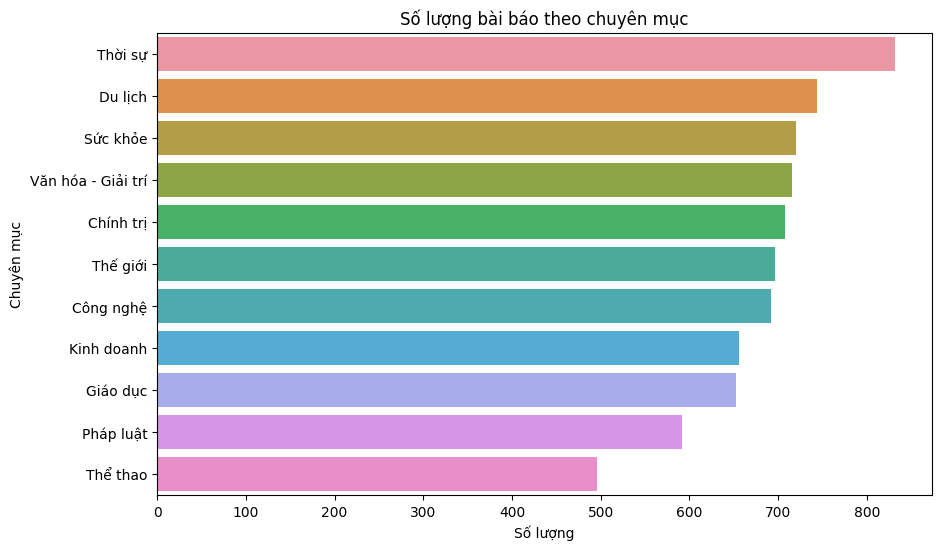

In [28]:
# --- Vẽ biểu đồ category---
plt.figure(figsize=(10,6))
sns.barplot(x=category_counts.values[:11], y=category_counts.index[:11])
plt.title("Số lượng bài báo theo chuyên mục")
plt.xlabel("Số lượng")
plt.ylabel("Chuyên mục")
plt.show()

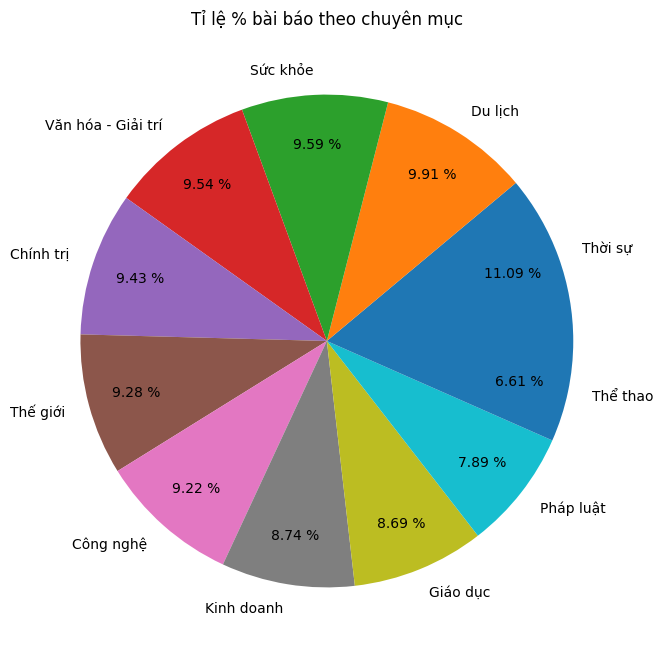

In [29]:
plt.figure(figsize=(8,8))
plt.pie(category_counts.values[:11],             
        labels=category_counts.index[:11],    
        autopct='%.2f %%', 
        pctdistance=0.8)
plt.title("Tỉ lệ % bài báo theo chuyên mục")
plt.show()

In [30]:
word_counts = df["content"].apply(lambda x: len(str(x).split()))
counts, bin_edges = np.histogram(word_counts, bins=30)
print(f"Phân bố độ dài bài báo (số từ):\n{counts}")
print(f"Khoảng giá trị của các bin: {bin_edges}")
max_bin_idx = np.argmax(counts)
most_common_range = (int(bin_edges[max_bin_idx]), int(bin_edges[max_bin_idx+1]))

print(f"Độ dài phổ biến nhất của các bài báo nằm trong khoảng: {most_common_range[0]}-{most_common_range[1]} từ ~ {counts[max_bin_idx]} bài")

Phân bố độ dài bài báo (số từ):
[1668 1888 1316 1280  692  448  140   84   36    8    4    8    8    4
    0    8    8    0    4   12    4    4    0    0    0    0    0    0
    0    4]
Khoảng giá trị của các bin: [ 200.          377.13333333  554.26666667  731.4         908.53333333
 1085.66666667 1262.8        1439.93333333 1617.06666667 1794.2
 1971.33333333 2148.46666667 2325.6        2502.73333333 2679.86666667
 2857.         3034.13333333 3211.26666667 3388.4        3565.53333333
 3742.66666667 3919.8        4096.93333333 4274.06666667 4451.2
 4628.33333333 4805.46666667 4982.6        5159.73333333 5336.86666667
 5514.        ]
Độ dài phổ biến nhất của các bài báo nằm trong khoảng: 377-554 từ ~ 1888 bài


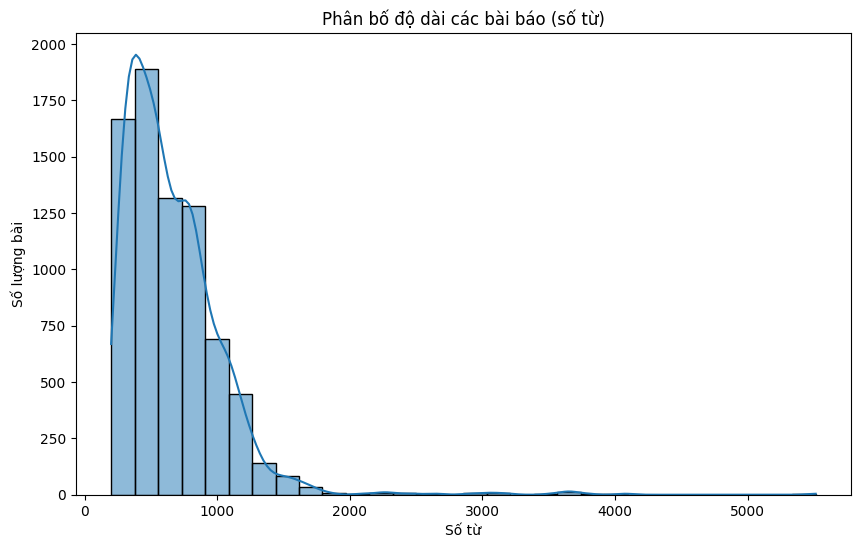

In [31]:
plt.figure(figsize=(10,6))
sns.histplot(df["content"].apply(lambda x: len(str(x).split())), bins=30, kde=True)
plt.title("Phân bố độ dài các bài báo (số từ)")
plt.xlabel("Số từ")
plt.ylabel("Số lượng bài")
plt.show()

In [32]:

def extract_datetime(s):
    if not isinstance(s, str):
        return None
    # Lấy phần ngày giờ: 20/08/2025 - 19:57
    match = re.search(r'(\d{2}/\d{2}/\d{4} - \d{2}:\d{2})', s)
    if match:
        return match.group(1)
    return None

df["published_date"] = df["metadata"].apply(
    lambda x: extract_datetime(x.get("published_date")) if isinstance(x, dict) else None
)
df["published_date"] = pd.to_datetime(df["published_date"], format="%d/%m/%Y - %H:%M", errors="coerce")

# Đếm số bài theo tháng
articles_by_month = df.groupby(df["published_date"].dt.to_period("M")).size()

print("\n=== Số lượng bài theo thời gian (theo tháng) ===")
print(articles_by_month)


=== Số lượng bài theo thời gian (theo tháng) ===
published_date
2024-03       8
2024-04       4
2024-06       8
2024-07      16
2024-08      20
2024-09      20
2024-10       4
2025-02       4
2025-03      24
2025-04      28
2025-05       8
2025-06     240
2025-07     788
2025-08    6456
Freq: M, dtype: int64


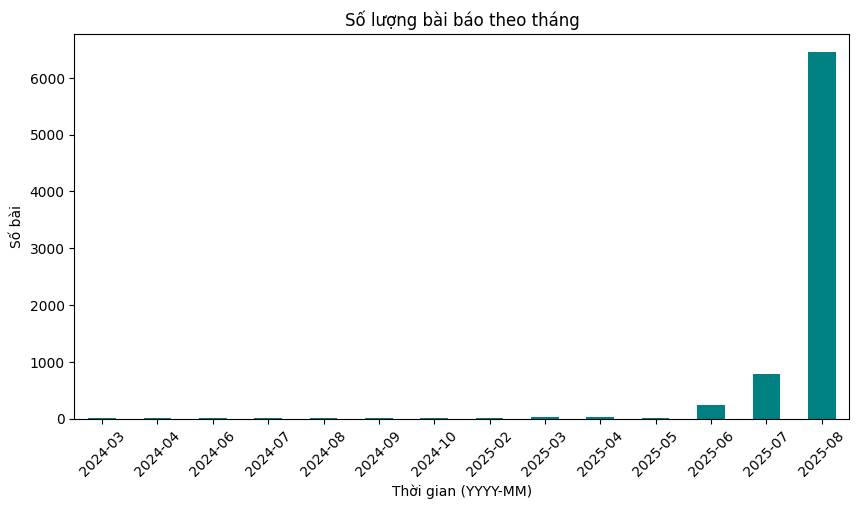

In [33]:
# Biểu đồ theo tháng
plt.figure(figsize=(10,5))
articles_by_month.plot(kind="bar", color="teal")
plt.title("Số lượng bài báo theo tháng")
plt.xlabel("Thời gian (YYYY-MM)")
plt.ylabel("Số bài")
plt.xticks(rotation=45)
plt.show()